In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
df = pd.read_csv(r'C:\Users\Dell\Downloads\happiness_score_dataset.csv')

In [8]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [9]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_9004\4226418653.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


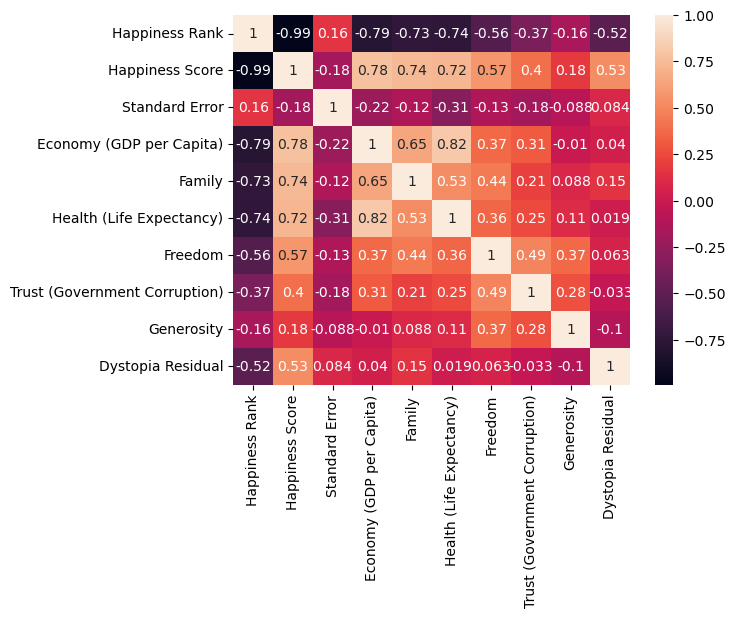

In [10]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True);

In [11]:
X = df.drop(['Dystopia Residual'], axis = 1)

In [13]:
X

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X['Country'] = label_encoder.fit_transform(X['Country'])

In [15]:
label_encoder = LabelEncoder()
X['Region'] = label_encoder.fit_transform(X['Region'])

In [16]:
X

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [17]:
Y = df['Dystopia Residual']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [18]:
X_train

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
141,120,8,142,3.904,0.03608,0.36498,0.97619,0.43540,0.36772,0.10713,0.20843
11,33,3,12,7.226,0.04454,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497
79,8,1,80,5.212,0.03363,1.02389,0.93793,0.64045,0.37030,0.16065,0.07799
68,72,1,69,5.589,0.05018,0.80148,0.81198,0.63132,0.24749,0.04741,0.28310
123,89,8,124,4.436,0.03947,0.45407,0.86908,0.35874,0.24232,0.17461,0.21900
...,...,...,...,...,...,...,...,...,...,...,...
71,56,2,72,5.474,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478
106,143,4,107,4.739,0.03589,0.88113,0.60429,0.73793,0.26268,0.06358,0.06431
14,150,5,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105
92,83,1,93,5.007,0.05376,0.91851,1.00232,0.73545,0.33457,0.05327,0.22359


In [19]:
Y_test

128    1.41805
45     1.68435
134    1.59927
156    1.83302
90     2.11032
29     2.83600
96     2.79832
98     1.73799
95     2.06367
140    1.42766
19     2.24743
56     2.32407
15     3.26001
69     1.86984
24     2.84848
30     2.67782
122    2.51009
109    1.69440
93     3.05137
65     1.59888
150    1.41723
18     2.41484
12     2.53320
9      2.26646
31     2.32142
81     1.87996
51     3.10712
139    1.95812
125    2.05125
146    1.85100
145    1.38079
75     2.08528
137    1.79293
55     2.44649
126    1.75873
84     2.63430
154    1.63328
42     2.74255
67     2.43209
117    2.20857
26     2.67585
136    1.94939
78     1.63794
149    1.99172
36     1.64880
76     2.23270
22     3.19131
133    0.89991
Name: Dystopia Residual, dtype: float64

In [20]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [21]:
model.score(X_train, Y_train)

0.9999997656322034

In [22]:
Y_pred = model.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared score: {r2:.3f}")

R-squared score: 1.000
